# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Reza Firmansyah Putranto
- **Email:** rezafp30@gmail.com
- **ID Dicoding:** reza_fp

## Menentukan Pertanyaan Bisnis

- Apa dampak dari frekuensi penyewaan terhadap customer retention?
- Bagaimana hubungan/korelasi antara recency of rental dengan frekuensi dan total sewa?

## Import Semua Packages/Library yang Digunakan

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [5]:
day_df = pd.read_csv("day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [6]:
hour_df = pd.read_csv("hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

### Menilai tabel day_df

In [7]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [8]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

day_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


### Menilai tabel hour_df

In [9]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [10]:
print("Jumlah duplikasi: ",hour_df.duplicated().sum())
hour_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

### Membersihkan tabel day_df

In [11]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


### Membersihkan Missing value

In [12]:
print("Missing values in day_df:")
print(day_df.isnull().sum())

Missing values in day_df:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [33]:
# Check for missing values and get a summary of the data
day_missing_values = day_df.isnull().sum()
day_summary = day_df.describe()

day_missing_values, day_summary

(instant       0
 dteday        0
 season        0
 yr            0
 mnth          0
 holiday       0
 weekday       0
 workingday    0
 weathersit    0
 temp          0
 atemp         0
 hum           0
 windspeed     0
 casual        0
 registered    0
 cnt           0
 dtype: int64,
           instant      season          yr        mnth     holiday     weekday  \
 count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
 mean   366.000000    2.496580    0.500684    6.519836    0.028728    2.997264   
 std    211.165812    1.110807    0.500342    3.451913    0.167155    2.004787   
 min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
 25%    183.500000    2.000000    0.000000    4.000000    0.000000    1.000000   
 50%    366.000000    3.000000    1.000000    7.000000    0.000000    3.000000   
 75%    548.500000    3.000000    1.000000   10.000000    0.000000    5.000000   
 max    731.000000    4.000000    1.000000   12.000000   

In [34]:
day_df_cleaned = day_df.dropna()

### Membersihkan Inaccurate Value

In [35]:
day_df_cleaned = day_df_cleaned[(day_df_cleaned['temp'] >= 0) & (day_df_cleaned['temp'] <= 41)]
day_df_cleaned = day_df_cleaned[(day_df_cleaned['atemp'] >= 0) & (day_df_cleaned['atemp'] <= 50)]
day_df_cleaned = day_df_cleaned[(day_df_cleaned['hum'] >= 0) & (day_df_cleaned['hum'] <= 100)]
day_df_cleaned = day_df_cleaned[(day_df_cleaned['windspeed'] >= 0) & (day_df_cleaned['windspeed'] <= 67)]

day_df_cleaned.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


### Membersihkan tabel hour_df

In [36]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


### Membersihkan Missing Value

In [37]:
print("Missing values in hour_df:")
print(hour_df.isnull().sum())

Missing values in hour_df:
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [38]:
# Check for missing values and get a summary of the data
hour_missing_values = hour_df.isnull().sum()
hour_summary = hour_df.describe()

hour_missing_values, hour_summary

(instant       0
 dteday        0
 season        0
 yr            0
 mnth          0
 hr            0
 holiday       0
 weekday       0
 workingday    0
 weathersit    0
 temp          0
 atemp         0
 hum           0
 windspeed     0
 casual        0
 registered    0
 cnt           0
 dtype: int64,
           instant        season            yr          mnth            hr  \
 count  17379.0000  17379.000000  17379.000000  17379.000000  17379.000000   
 mean    8690.0000      2.501640      0.502561      6.537775     11.546752   
 std     5017.0295      1.106918      0.500008      3.438776      6.914405   
 min        1.0000      1.000000      0.000000      1.000000      0.000000   
 25%     4345.5000      2.000000      0.000000      4.000000      6.000000   
 50%     8690.0000      3.000000      1.000000      7.000000     12.000000   
 75%    13034.5000      3.000000      1.000000     10.000000     18.000000   
 max    17379.0000      4.000000      1.000000     12.000000     23.0000

In [39]:
hour_df_cleaned = hour_df.dropna()

### Membersihkan Inaccurate Value

In [40]:
hour_df_cleaned = hour_df_cleaned[(hour_df_cleaned['temp'] >= 0) & (hour_df_cleaned['temp'] <= 41)]
hour_df_cleaned = hour_df_cleaned[(hour_df_cleaned['temp'] >= 0) & (hour_df_cleaned['temp'] <= 50)]
hour_df_cleaned = hour_df_cleaned[(hour_df_cleaned['temp'] >= 0) & (hour_df_cleaned['temp'] <= 100)]
hour_df_cleaned = hour_df_cleaned[(hour_df_cleaned['temp'] >= 0) & (hour_df_cleaned['temp'] <= 67)]

hour_df_cleaned.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


## Exploratory Data Analysis (EDA)

### Menggabungkan day_df dengan hour_df

In [41]:
# Copy of the data
day_df_cleaned = day_df.copy()
hour_df_cleaned = hour_df.copy()

combined_df = pd.merge(hour_df_cleaned, day_df_cleaned.drop(columns=['instant']), on='dteday', how='left')

# Check the combined dataframe
print("Combined DataFrame:")
print(combined_df.head())

Combined DataFrame:
   instant      dteday  season_x  yr_x  mnth_x  hr  holiday_x  weekday_x  \
0        1  2011-01-01         1     0       1   0          0          6   
1        2  2011-01-01         1     0       1   1          0          6   
2        3  2011-01-01         1     0       1   2          0          6   
3        4  2011-01-01         1     0       1   3          0          6   
4        5  2011-01-01         1     0       1   4          0          6   

   workingday_x  weathersit_x  ...  weekday_y  workingday_y  weathersit_y  \
0             0             1  ...          6             0             2   
1             0             1  ...          6             0             2   
2             0             1  ...          6             0             2   
3             0             1  ...          6             0             2   
4             0             1  ...          6             0             2   

     temp_y   atemp_y     hum_y  windspeed_y  casual_y  regi

### Explore Gabungan day_df dan hour_df

#### Basic Distribution

In [42]:
print("Basic statistics for combined_df:")
print(combined_df.describe())

Basic statistics for combined_df:
          instant      season_x          yr_x        mnth_x            hr  \
count  17379.0000  17379.000000  17379.000000  17379.000000  17379.000000   
mean    8690.0000      2.501640      0.502561      6.537775     11.546752   
std     5017.0295      1.106918      0.500008      3.438776      6.914405   
min        1.0000      1.000000      0.000000      1.000000      0.000000   
25%     4345.5000      2.000000      0.000000      4.000000      6.000000   
50%     8690.0000      3.000000      1.000000      7.000000     12.000000   
75%    13034.5000      3.000000      1.000000     10.000000     18.000000   
max    17379.0000      4.000000      1.000000     12.000000     23.000000   

          holiday_x     weekday_x  workingday_x  weathersit_x        temp_x  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.028770      3.003683      0.682721      1.425283      0.496987   
std        0.167165      2.005771  

#### Data Distribution

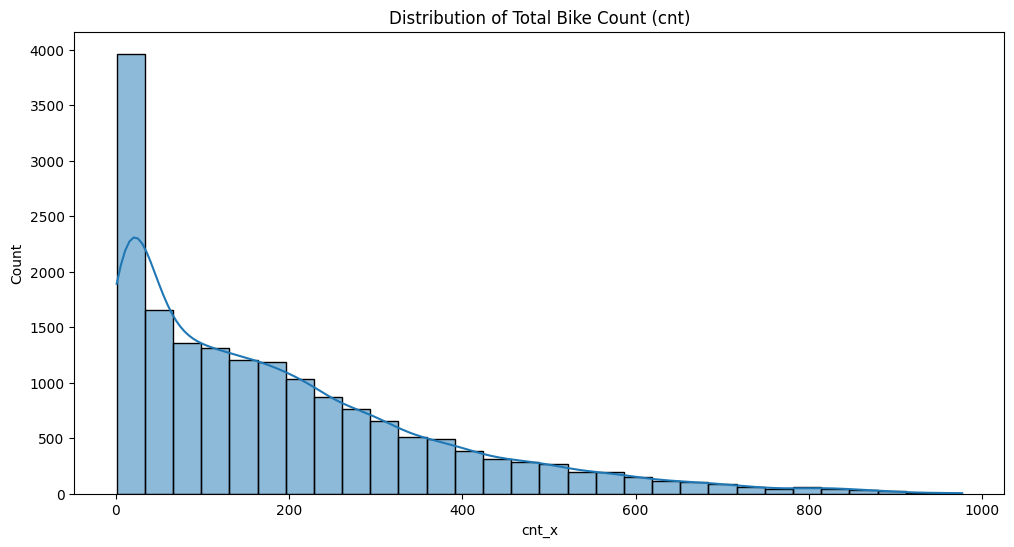

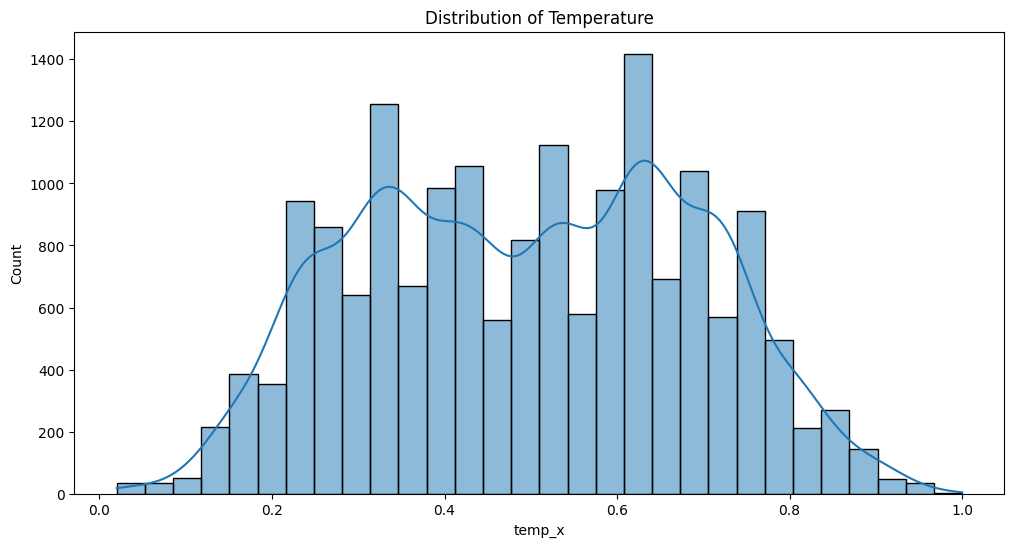

In [46]:
plt.figure(figsize=(12, 6))
sns.histplot(combined_df['cnt_x'], bins=30, kde=True)
plt.title('Distribution of Total Bike Count (cnt)')
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(combined_df['temp_x'], bins=30, kde=True)
plt.title('Distribution of Temperature')
plt.show()

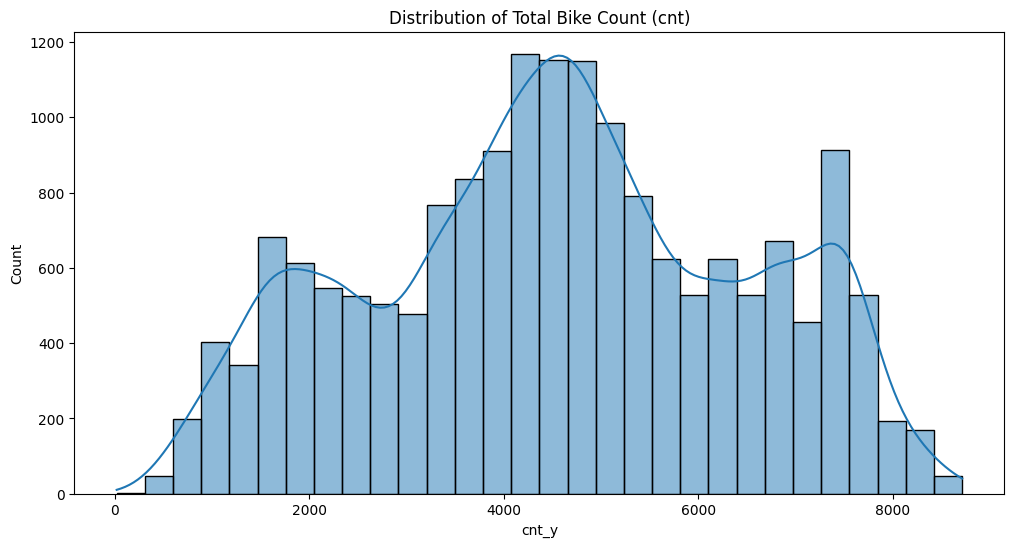

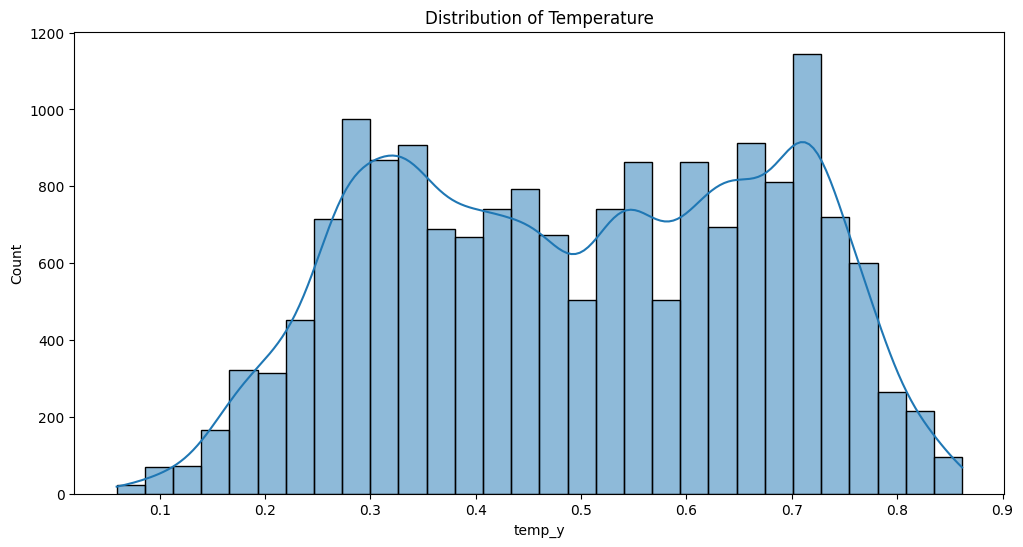

In [47]:
plt.figure(figsize=(12, 6))
sns.histplot(combined_df['cnt_y'], bins=30, kde=True)
plt.title('Distribution of Total Bike Count (cnt)')
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(combined_df['temp_y'], bins=30, kde=True)
plt.title('Distribution of Temperature')
plt.show()

#### Time Series Analysis

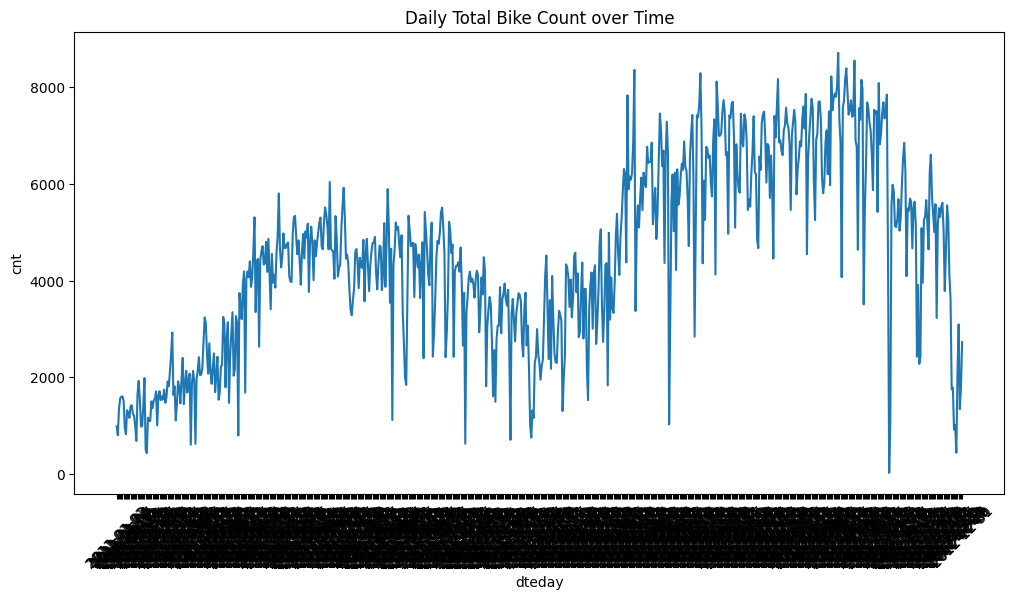

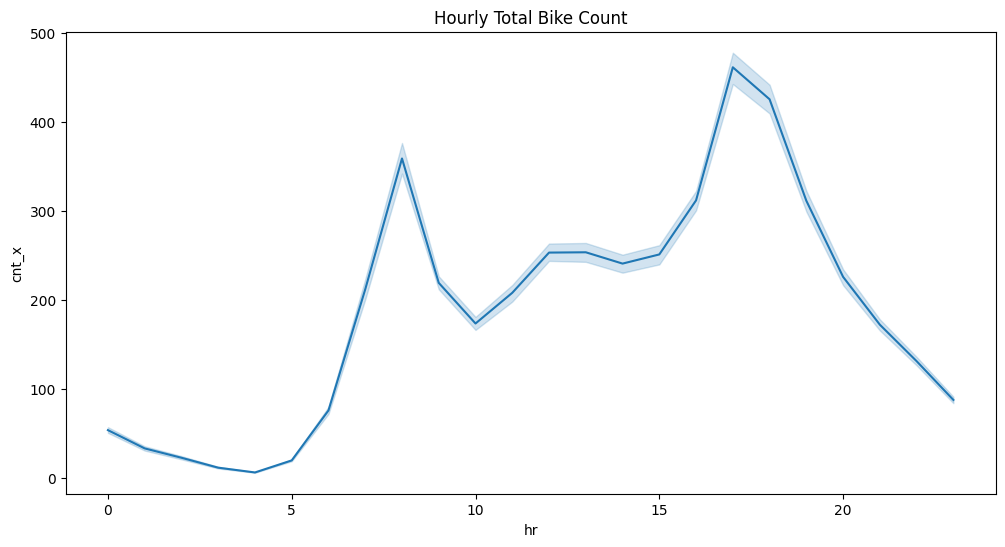

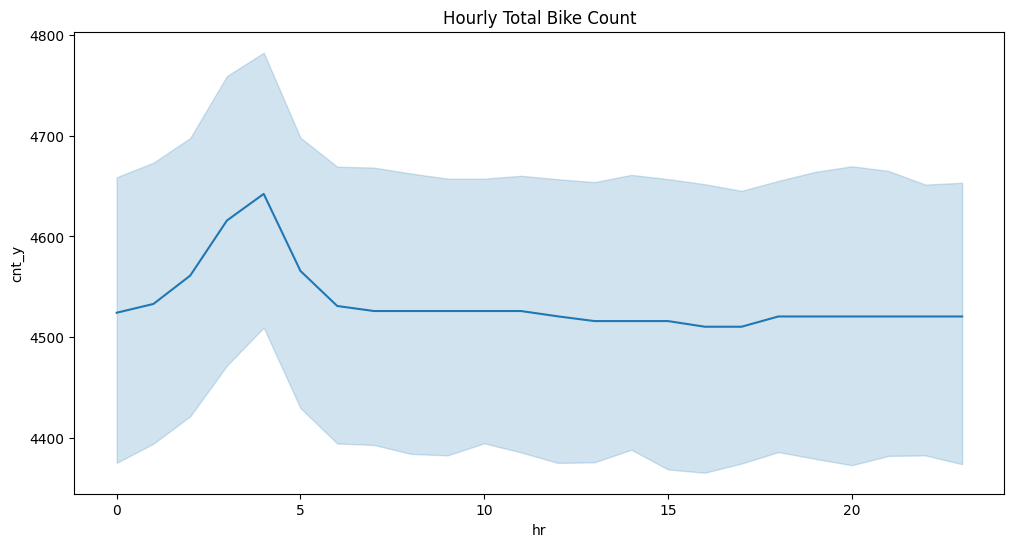

In [53]:
# Plot daily total bike count (cnt) over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='dteday', y='cnt', data=day_df_cleaned)
plt.xticks(rotation=45)
plt.title('Daily Total Bike Count over Time')
plt.show()

# Plot hourly total bike count (cnt) over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='hr', y='cnt_x', data=combined_df)
plt.title('Hourly Total Bike Count')
plt.show()

# Plot hourly total bike count (cnt) over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='hr', y='cnt_y', data=combined_df)
plt.title('Hourly Total Bike Count')
plt.show()

#### Correlation Analysis

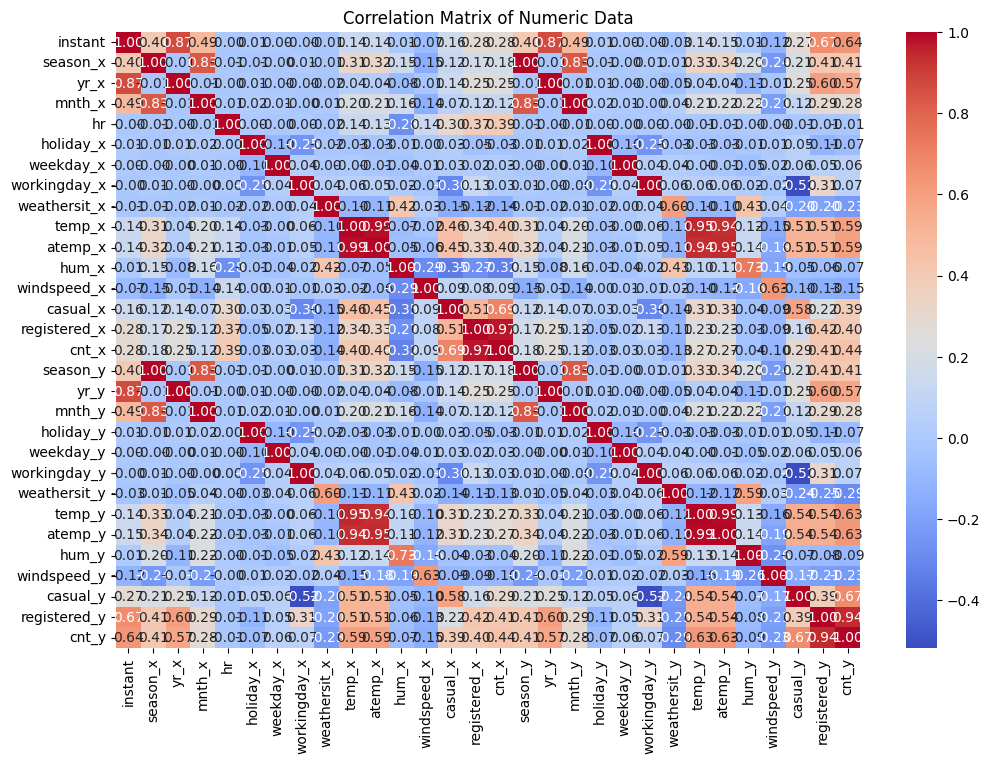

In [55]:
# Select only numeric columns for correlation analysis
numeric_columns = combined_df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = combined_df[numeric_columns].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numeric Data')
plt.show()

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana suhu memengaruhi penyewaan sepeda pada kesehari-hariannya?

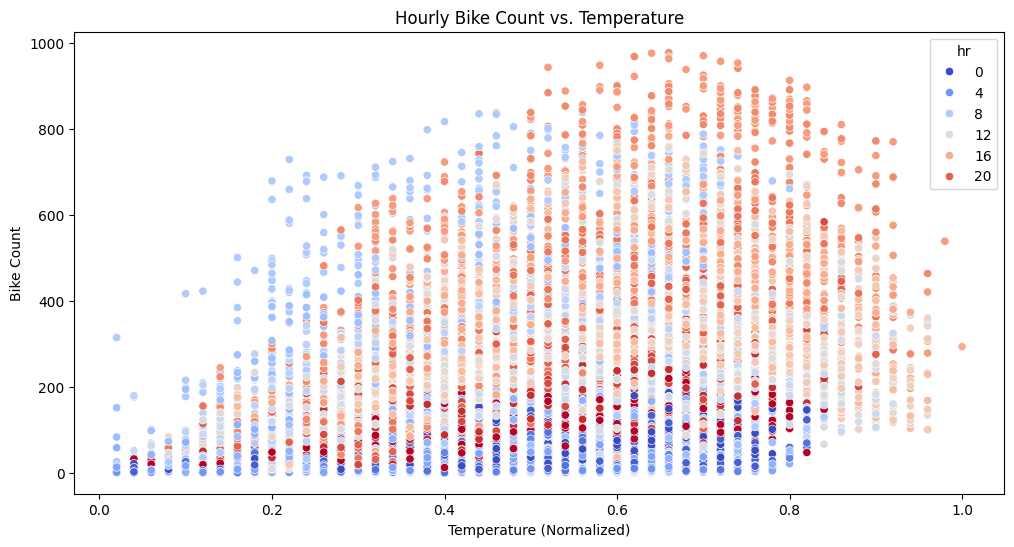

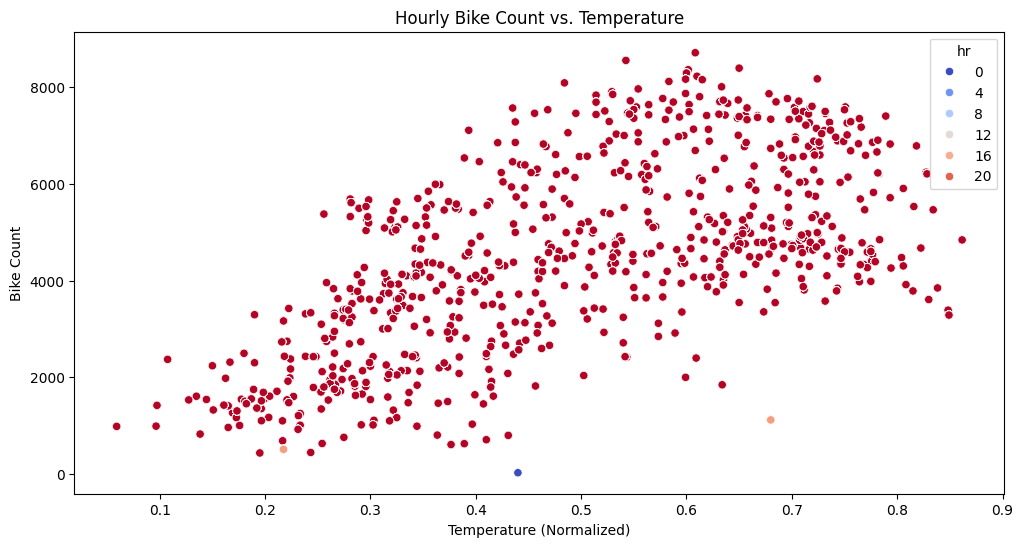

In [63]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='temp_x', y='cnt_x', data=combined_df, hue='hr', palette='coolwarm')
plt.title('Hourly Bike Count vs. Temperature')
plt.xlabel('Temperature (Normalized)')
plt.ylabel('Bike Count')
plt.show()

plt.figure(figsize=(12, 6))
sns.scatterplot(x='temp_y', y='cnt_y', data=combined_df, hue='hr', palette='coolwarm')
plt.title('Hourly Bike Count vs. Temperature')
plt.xlabel('Temperature (Normalized)')
plt.ylabel('Bike Count')
plt.show()

*   Diagram diatas menunjukkan hubungan antara suhu dan penggunaan sepeda, yang diwarnai berdasarkan jam dalam sehari.
*   Penyewaan sepeda akan meningkat seiring dengan suhu yang lebih hangat hingga titik tertentu, setelah itu suhu yang ekstrem dapat mengurangi penggunaan. Selain itu, jam-jam tertentu (misalnya, waktu perjalanan) dapat menunjukkan penyewaan yang lebih tinggi.





### Pertanyaan 2: Kapan jam sibuk/ramai dan jam sepi untuk penyewaan sepeda?

<ipython-input-68-634174d3c3d2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='hr', y='cnt_x', data=combined_df, palette='coolwarm')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group 

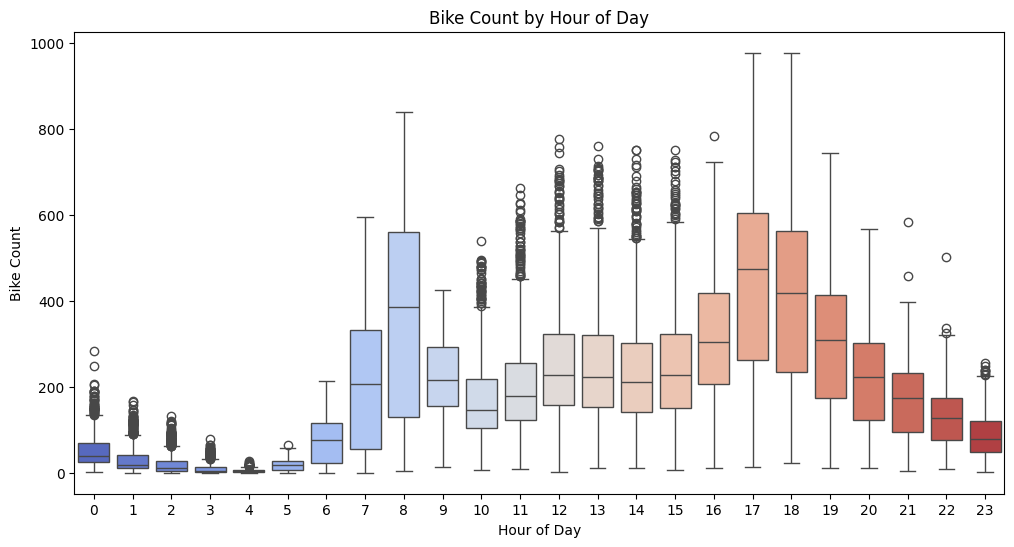

<ipython-input-68-634174d3c3d2>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='hr', y='cnt_y', data=combined_df, palette='coolwarm')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group 

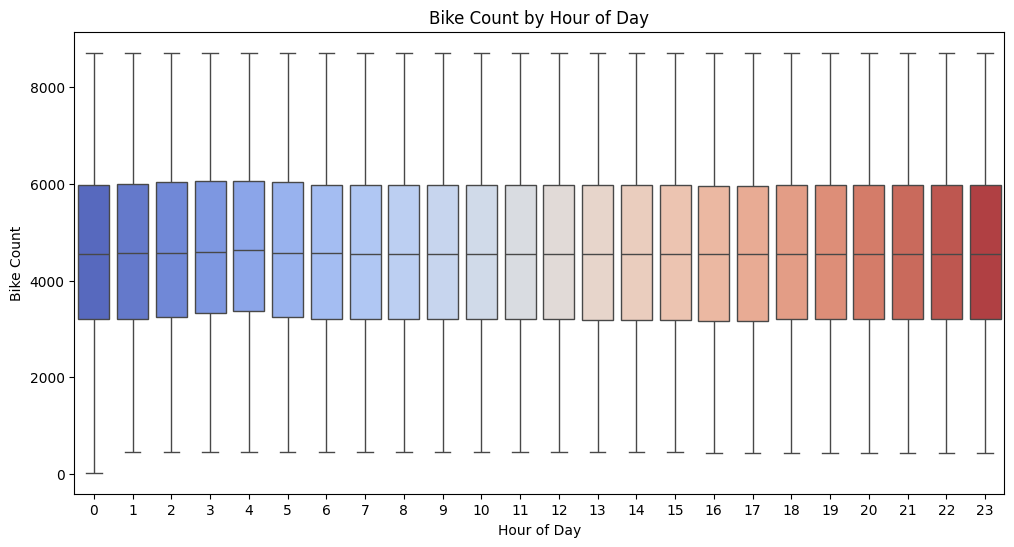

In [68]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='hr', y='cnt_x', data=combined_df, palette='coolwarm')
plt.title('Bike Count by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Bike Count')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='hr', y='cnt_y', data=combined_df, palette='coolwarm')
plt.title('Bike Count by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Bike Count')
plt.show()

#### Diagram diatas menunjukkan perubahan jumlah penyewaan sepeda sepanjang hari. Puncak penggunaan diperkirakan terjadi selama jam-jam sibuk (misalnya, pagi dan sore), sementara penggunaan dapat menurun selama waktu-waktu di luar jam sibuk seperti larut malam atau sore hari.

### Correlation Heatmap

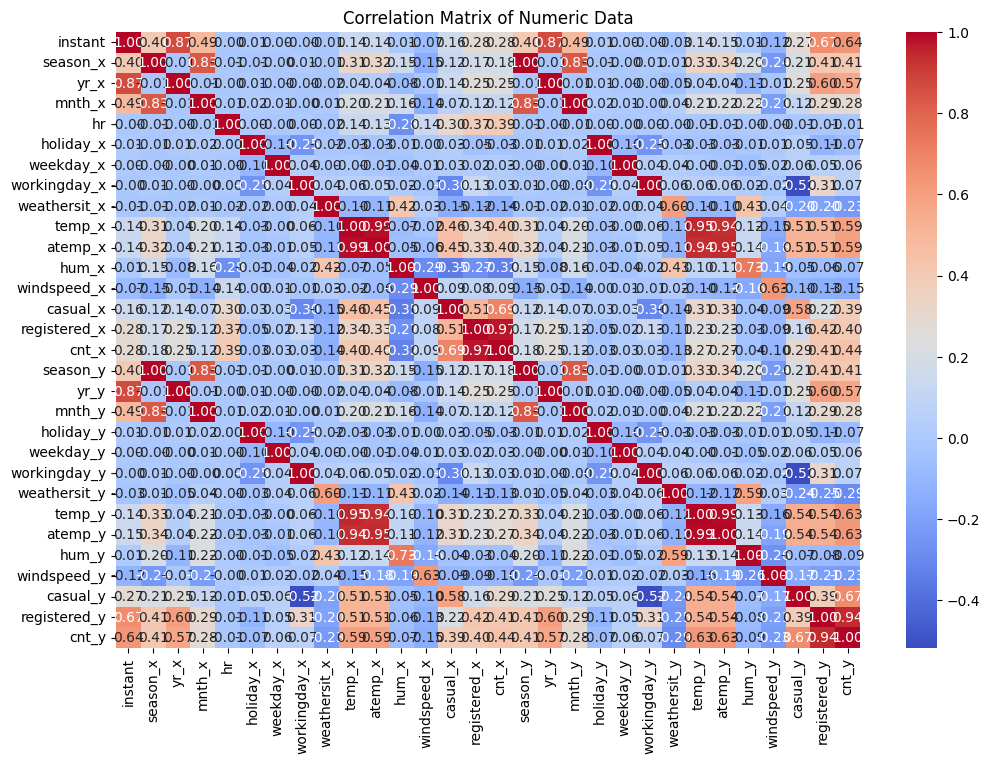

In [69]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numeric Data')
plt.show()

#### Gambar diatas menyoroti korelasi antara variabel seperti suhu, kelembapan, kecepatan angin, dan jumlah sepeda. Misalnya, kita dapat mengidentifikasi apakah suhu yang lebih tinggi berkorelasi kuat dengan lebih banyak penyewaan sepeda, atau apakah kecepatan angin atau kelembapan memengaruhi jumlah secara negatif.

## RFM Analysis

In [70]:
combined_df['dteday'] = pd.to_datetime(combined_df['dteday'])
current_date = combined_df['dteday'].max()

In [76]:
rfm_df = combined_df.groupby(['dteday', 'hr']).agg({
    'cnt_x': ['sum', 'count'],
}).reset_index()

rfm_df = combined_df.groupby(['dteday', 'hr']).agg({
    'cnt_y': ['sum', 'count'],
}).reset_index()

rfm_df.head()

dteday hr cnt_y      
                  sum count
0 2011-01-01  0   985     1
1 2011-01-01  1   985     1
2 2011-01-01  2   985     1
3 2011-01-01  3   985     1
4 2011-01-01  4   985     1

In [77]:
rfm_df.columns = ['dteday', 'hr', 'monetary_value', 'frequency']
rfm_df.head()

,dteday,hr,monetary_value,frequency
0,2011-01-01,0,985,1
1,2011-01-01,1,985,1
2,2011-01-01,2,985,1
3,2011-01-01,3,985,1
4,2011-01-01,4,985,1


### Menghitung Recency berdasarkan hari penyewaan terakhir

In [78]:
rfm_df['recency'] = (current_date - rfm_df['dteday']).dt.days
rfm_df.head()

,dteday,hr,monetary_value,frequency,recency
0,2011-01-01,0,985,1,730
1,2011-01-01,1,985,1,730
2,2011-01-01,2,985,1,730
3,2011-01-01,3,985,1,730
4,2011-01-01,4,985,1,730


### Penghitungan RFM Score

In [94]:
print(rfm_df['recency'].nunique())
print(rfm_df['frequency'].nunique())
print(rfm_df['monetary_value'].nunique())

731
1
696


In [95]:
# Recency score (Adjust number of bins based on unique values)
recency_bins = min(rfm_df['recency'].nunique(), 5)
rfm_df['r_score'] = pd.qcut(rfm_df['recency'], recency_bins, labels=range(recency_bins, 0, -1), duplicates='drop')

# Frequency score (Adjust number of bins based on unique values)
frequency_bins = min(rfm_df['frequency'].nunique(), 5)
rfm_df['f_score'] = pd.qcut(rfm_df['frequency'], frequency_bins, labels=range(1, frequency_bins + 1), duplicates='drop')

# Monetary value score (Adjust number of bins based on unique values)
monetary_bins = min(rfm_df['monetary_value'].nunique(), 5)
rfm_df['m_score'] = pd.qcut(rfm_df['monetary_value'], monetary_bins, labels=range(1, monetary_bins + 1), duplicates='drop')

### Menggabungkan RFM Score

In [97]:
rfm_df['RFM_Score'] = rfm_df['r_score'].astype(str) + rfm_df['f_score'].astype(str) + rfm_df['m_score'].astype(str)
print(rfm_df.head())

      dteday  hr  monetary_value  frequency  recency r_score f_score m_score  \
0 2011-01-01   0             985          1      730       1       1       1   
1 2011-01-01   1             985          1      730       1       1       1   
2 2011-01-01   2             985          1      730       1       1       1   
3 2011-01-01   3             985          1      730       1       1       1   
4 2011-01-01   4             985          1      730       1       1       1   

  RFM_Score  
0       111  
1       111  
2       111  
3       111  
4       111  


### Visualisasi Recency vs Frequency berdasarkan nilai Monetary

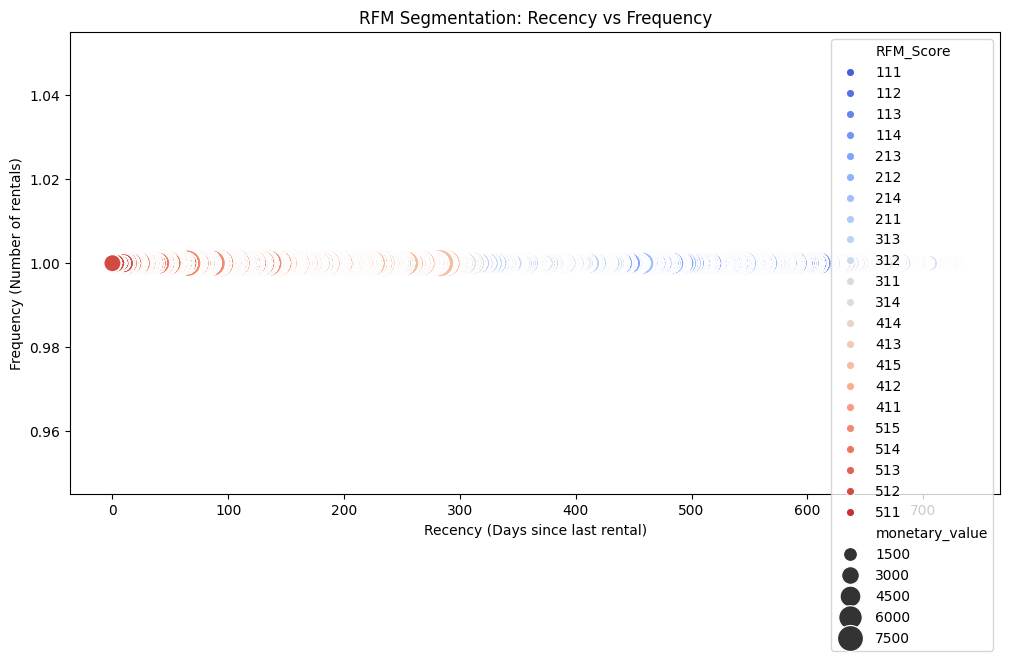

In [98]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='recency', y='frequency', size='monetary_value', hue='RFM_Score', data=rfm_df, palette='coolwarm', sizes=(40, 400))
plt.title('RFM Segmentation: Recency vs Frequency')
plt.xlabel('Recency (Days since last rental)')
plt.ylabel('Frequency (Number of rentals)')
plt.show()

## Conclusion

- Pelanggan yang termasuk dalam segmen frekuensi tinggi (skor 4 atau 5) cenderung lebih terlibat dan puas dengan layanan. Untuk meningkatkan retention, bisnis harus mempertimbangkan marketing yang ditargetkan, loyalty programs, atau penawaran khusus untuk mendorong penyewa agar terus menggunakan layanan. Selain itu, memahami preferensi dan perilaku pelanggan dapat memberikan informasi untuk peningkatan layanan atau penawaran baru.
- Pelanggan yang baru saja menyewa sepeda (skor keterkinian rendah) cenderung kembali untuk menyewa lagi. Hal ini menunjukkan bahwa bisnis harus menerapkan strategi tindak lanjut (misalnya, diskon atau penawaran khusus) yang menargetkan pelanggan yang sudah lama tidak menyewa untuk mendorong mereka menyewa kembali.